In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# enable the Ipython magic
%matplotlib inline

In [2]:
db= pd.read_csv('C:/Users/xuliu/Dropbox/OD data/Taxi/Taxicab_Trips_sample_July_2017.csv')
# read the first 5-rows of the dataset
db.head(5)

,OBJECTID_1,OBJECTID,TRIPTYPE,PROVIDER,METERFARE,TIP,SURCHARGE,EXTRAS,TOLLS,TOTALAMOUNT,...,TRIPTIME,PICKUP_BLOCK_LATITUDE,PICKUP_BLOCK_LONGITUDE,PICKUP_BLOCKNAME,DROPOFF_BLOCK_LATITUDE,DROPOFF_BLOCK_LONGITUDE,DROPOFF_BLOCKNAME,AIRPORT,PICKUPDATETIME_TR,DROPOFFDATETIME_TR
0,2001,27233215,PSP,CMT,10.27,0.0,0.25,1.25,0.0,11.77,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,N,2017-07-28T18:00:00.000Z,2017-07-28T18:00:00.000Z
1,2002,27233216,PSP,CMT,8.38,2.0,0.25,0.25,0.0,10.88,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,N,2017-07-28T19:00:00.000Z,2017-07-28T19:00:00.000Z
2,2003,27233217,PSP,CMT,13.51,0.0,0.25,1.25,0.0,15.01,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,N,2017-07-28T19:00:00.000Z,2017-07-28T20:00:00.000Z
3,2004,27233218,PSP,CMT,10.27,0.0,0.25,1.25,0.0,11.77,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,N,2017-07-28T21:00:00.000Z,2017-07-28T21:00:00.000Z
4,2005,27233219,PSP,CMT,22.42,5.7,0.25,0.25,0.0,28.62,...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,N,2017-07-28T20:00:00.000Z,2017-07-28T20:00:00.000Z


In [5]:
# get the list of column names and drop the unnessary ones
C_names=list(db.columns.values)
C_names

['OBJECTID_1',
 'OBJECTID',
 'TRIPTYPE',
 'PROVIDER',
 'METERFARE',
 'TIP',
 'SURCHARGE',
 'EXTRAS',
 'TOLLS',
 'TOTALAMOUNT',
 'PAYMENTTYPE',
 'PAYMENTCARDPROVIDER',
 'PICKUPCITY',
 'PICKUPSTATE',
 'PICKUPZIP',
 'DROPOFFCITY',
 'DROPOFFSTATE',
 'DROPOFFZIP',
 'TRIPMILEAGE',
 'TRIPTIME',
 'PICKUP_BLOCK_LATITUDE',
 'PICKUP_BLOCK_LONGITUDE',
 'PICKUP_BLOCKNAME',
 'DROPOFF_BLOCK_LATITUDE',
 'DROPOFF_BLOCK_LONGITUDE',
 'DROPOFF_BLOCKNAME',
 'AIRPORT',
 'PICKUPDATETIME_TR',
 'DROPOFFDATETIME_TR']

In [3]:
# drop the columes unwanted for taxi fare and rename the dataset to 
df=db.drop(['OBJECTID_1','TRIPTYPE','PROVIDER','METERFARE','TIP','SURCHARGE','EXTRAS','TOLLS','TOTALAMOUNT','PAYMENTTYPE','PAYMENTCARDPROVIDER','PICKUPZIP','DROPOFFZIP'],axis=1)

In [4]:
# drop the rows with NaNs in picup dropoff latitude & longtitude and the ones without their corresponding time
df=df.dropna(subset=['PICKUP_BLOCK_LATITUDE','PICKUP_BLOCK_LONGITUDE','DROPOFF_BLOCK_LATITUDE','DROPOFF_BLOCK_LONGITUDE','PICKUPDATETIME_TR','DROPOFFDATETIME_TR'])

# get the info of the selected data before droping the shape is (228611,16)
df.shape 

(165271, 16)

In [5]:
# transform the pickup datetime to the index
df.PICKUPDATETIME_TR=pd.to_datetime(df.PICKUPDATETIME_TR)

df.set_index('PICKUPDATETIME_TR', inplace=True)

df.head(5)

,OBJECTID,PICKUPCITY,PICKUPSTATE,DROPOFFCITY,DROPOFFSTATE,TRIPMILEAGE,TRIPTIME,PICKUP_BLOCK_LATITUDE,PICKUP_BLOCK_LONGITUDE,PICKUP_BLOCKNAME,DROPOFF_BLOCK_LATITUDE,DROPOFF_BLOCK_LONGITUDE,DROPOFF_BLOCKNAME,AIRPORT,DROPOFFDATETIME_TR
PICKUPDATETIME_TR,,,,,,,,,,,,,,,
2017-07-26 07:00:00,27233233,NaN,NaN,NaN,NaN,1.00,6.0,38.916875,-77.046385,2000 - 2099 BLOCK OF CALIFORNIA STREET NW,38.898948,-77.043464,700 - 799 BLOCK OF 19TH STREET NW,N,2017-07-26T07:00:00.000Z
2017-07-27 14:00:00,27233329,NaN,District of Columbia,NaN,District of Columbia,4.71,17.0,38.902524,-77.045773,2000 - 2099 BLOCK OF K STREET NW,38.881278,-77.019386,500 598 BLOCK OF G STREET SW,N,2017-07-27T14:00:00.000Z
2017-07-27 15:00:00,27233330,NaN,District of Columbia,NaN,District of Columbia,1.59,7.0,38.896018,-77.047347,2100 - 2199 BLOCK OF E STREET NW,38.903144,-77.039667,1000 - 1099 BLOCK OF CONNECTICUT AVENUE NW,N,2017-07-27T15:00:00.000Z
2017-07-27 15:00:00,27233331,NaN,District of Columbia,NaN,District of Columbia,2.53,8.0,38.903741,-77.039260,1700 - 1717 BLOCK OF L STREET NW,38.921373,-77.031901,2401 - 2499 BLOCK OF 14TH STREET NW,N,2017-07-27T15:00:00.000Z
2017-07-27 16:00:00,27233332,NaN,District of Columbia,NaN,District of Columbia,0.72,3.0,38.917000,-77.028852,1200 - 1299 BLOCK OF U STREET NW,38.922429,-77.030858,1300 - 1399 BLOCK OF CLIFTON STREET NW,N,2017-07-27T16:00:00.000Z


In [ ]:
# write the df to csv for stroage 
df.to_csv('')

In [20]:
len(df.loc['2017-07-28 00:00:00':'2017-07-28 23:00:00'])

27761

In [12]:
len(df.loc['2017-07-27 00:00:00':'2017-07-27 23:00:00'])

29094

In [14]:
# Tuesday
len(df.loc['2017-07-25 00:00:00':'2017-07-25 23:00:00'])

27005

In [18]:
# monday
len(df.loc['2017-07-24 00:00:00':'2017-07-24 23:00:00'])

22231

In [27]:
# wednesday
df.loc['2017-07-26 00:00:00':'2017-07-26 23:00:00']

,OBJECTID,PICKUPCITY,PICKUPSTATE,DROPOFFCITY,DROPOFFSTATE,TRIPMILEAGE,TRIPTIME,PICKUP_BLOCK_LATITUDE,PICKUP_BLOCK_LONGITUDE,PICKUP_BLOCKNAME,DROPOFF_BLOCK_LATITUDE,DROPOFF_BLOCK_LONGITUDE,DROPOFF_BLOCKNAME,AIRPORT,DROPOFFDATETIME_TR
PICKUPDATETIME_TR,,,,,,,,,,,,,,,
2017-07-26 07:00:00,27233233,NaN,NaN,NaN,NaN,1.00,6.0,38.916875,-77.046385,2000 - 2099 BLOCK OF CALIFORNIA STREET NW,38.898948,-77.043464,700 - 799 BLOCK OF 19TH STREET NW,N,2017-07-26T07:00:00.000Z
2017-07-26 12:00:00,27233788,NaN,NaN,NaN,NaN,2.00,14.0,38.900771,-77.031962,800 - 899 BLOCK OF 14TH STREET NW,38.897204,-77.008388,1 - 99 BLOCK OF MASSACHUSETTS AVENUE NE,N,2017-07-26T12:00:00.000Z
2017-07-26 11:00:00,27233789,NaN,NaN,NaN,NaN,1.00,4.0,38.905199,-77.040856,1130 - 1199 BLOCK OF CONNECTICUT AVENUE NW,38.902856,-77.051070,2300 - 2399 BLOCK OF PENNSYLVANIA AVENUE NW,N,2017-07-26T11:00:00.000Z
2017-07-26 11:00:00,27233790,NaN,NaN,NaN,NaN,2.00,13.0,38.905258,-77.052352,2400 - 2499 BLOCK OF M STREET NW,38.892083,-77.027064,1000 - 1199 BLOCK OF CONSTITUTION AVENUE NW,N,2017-07-26T11:00:00.000Z
2017-07-26 11:00:00,27233791,NaN,NaN,NaN,NaN,1.00,8.0,38.902525,-77.042574,1800 - 1899 BLOCK OF K STREET NW,38.905654,-77.039814,1700 - 1779 BLOCK OF M STREET NW,N,2017-07-26T11:00:00.000Z
2017-07-26 10:00:00,27233792,NaN,NaN,NaN,NaN,2.00,16.0,38.895786,-77.029636,400 - 499 BLOCK OF 13TH STREET NW,38.905265,-77.049461,2200 - 2299 BLOCK OF M STREET NW,N,2017-07-26T10:00:00.000Z
2017-07-26 09:00:00,27233793,NaN,NaN,NaN,NaN,3.00,15.0,38.921623,-77.042365,2400 - 2499 BLOCK OF 18TH STREET NW,38.904207,-77.009069,1100 - 1119 BLOCK OF NORTH CAPITOL STREET,N,2017-07-26T09:00:00.000Z
2017-07-26 07:00:00,27233916,NaN,District of Columbia,NaN,District of Columbia,3.67,14.0,38.910755,-77.038488,1518 - 1599 BLOCK OF 17TH STREET NW,38.897204,-77.008388,1 - 99 BLOCK OF MASSACHUSETTS AVENUE NE,N,2017-07-26T07:00:00.000Z
2017-07-26 08:00:00,27233917,NaN,District of Columbia,NaN,District of Columbia,1.88,7.0,38.896039,-77.007142,40 - 49 BLOCK OF COLUMBUS CIRCLE NE,38.887591,-77.010609,1 - 99 BLOCK OF INDEPENDENCE AVENUE SW,N,2017-07-26T08:00:00.000Z


In [32]:
DF=df.fillna('unspecified')

In [34]:
res1=DF.loc['2017.-07-26 00:00:00':'2017-07-26 23:00:00'].groupby(['PICKUPDATETIME_TR','PICKUPSTATE','DROPOFFSTATE']).agg(['mean', 'count'])

In [36]:
res1.to_csv('tof_by_states.csv',sep=',')

In [37]:
DF.drop('OBJECTID').shape

(165271, 15)

In [39]:
DF.loc['2017.-07-26 00:00:00':'2017-07-26 23:00:00'].to_csv('Taxi_data_Wed_July.csv',sep=',')

In [46]:
res1[['PICKUPSTATE']].plot

KeyError: "['PICKUPSTATE'] not in index"

In [47]:
list(res1.columns.values)

[('OBJECTID', 'mean'),
 ('OBJECTID', 'count'),
 ('TRIPMILEAGE', 'mean'),
 ('TRIPMILEAGE', 'count'),
 ('PICKUP_BLOCK_LATITUDE', 'mean'),
 ('PICKUP_BLOCK_LATITUDE', 'count'),
 ('PICKUP_BLOCK_LONGITUDE', 'mean'),
 ('PICKUP_BLOCK_LONGITUDE', 'count'),
 ('DROPOFF_BLOCK_LATITUDE', 'mean'),
 ('DROPOFF_BLOCK_LATITUDE', 'count'),
 ('DROPOFF_BLOCK_LONGITUDE', 'mean'),
 ('DROPOFF_BLOCK_LONGITUDE', 'count')]

Text(0.5,0,'time')

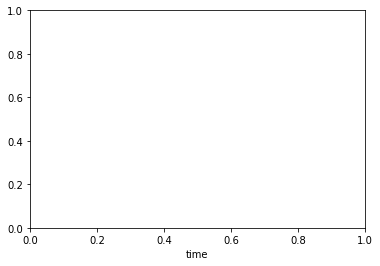

In [50]:
res1[('TRIPMILEAGE', 'count')].plot
plt.xlabel('time')